## Aula 3 - Detecção de faces e olhos

Usar arquivo xml

In [5]:
import cv2
import matplotlib.pyplot as plt

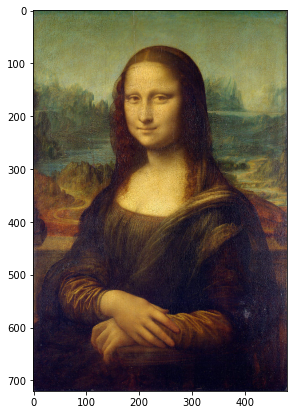

In [101]:
image = cv2.imread("monalisa.jpg")
res = cv2.resize(image, dsize = (480, 720), interpolation = cv2.INTER_CUBIC)
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,7))
plt.imshow(res);

In [97]:
face_class = cv2.CascadeClassifier('xml/haarcascade_frontalface_default.xml')
eye_class = cv2.CascadeClassifier('xml/haarcascade_eye.xml')

In [102]:
image_gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
# só o rosto
faces = face_class.detectMultiScale(image_gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(res, (x,y), (x+w, y+h), (255,0,0), 2)
    
cv2.imshow('monalisa', res)
cv2.waitKey(0)
cv2.destroyWindow('monalisa')

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: 'monalisa' in function 'cvDestroyWindow'


In [103]:
faces
# 1 face (1 array)

array([[149, 116, 134, 134]])

In [70]:
# Detecção de rosto e olho em imagem (https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php)

# cv2.CascadeClassifier.detectMultiScale(image, scale factor, minNeighbors)
faces = face_class.detectMultiScale(image_gray, 1.3, 5)

for (x,y,w,h) in faces:
    
    # cv2.rectangle(image, start_point, end_point, color, thickness) : só cria o retângulo sobre a foto
    cv2.rectangle(res, (x,y), (x+w, y+h), (255,0,0), 2)
    
    # roi : region of interest
    roi_gray = image_gray[y:y+h, x:x+w]
    roi_color = res[y:y+h, x:x+w]
    eyes = eye_class.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
        
    cv2.imshow('monalisa', res)
    cv2.waitKey(0)
    cv2.destroyWindow('monalisa')

In [71]:
faces

()

In [ ]:
# Detecção de rosto e olho em video

# Utilizar videos existentes?
video = cv2.VideoCapture(0)

while True:
    conectado, frame = video.read()
    frame_cinza = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_class.detectMultiScale(frame_cinza, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
        # roi : region of interest
        roi_gray = frame_cinza[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_class.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
    
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) == ord('s'):
        break

video.realease()
cv2.destroyAllWindows()

### Outros conceitos

In [2]:
!pip install mediapipe

  Using cached mediapipe-0.8.10.1-cp38-cp38-win_amd64.whl (48.7 MB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-win_amd64.whl (42.5 MB)



In [3]:
import mediapipe as mp
import cv2

In [4]:
# O que é cada um desses?
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

In [ ]:
# Usa grafos para detectar movimento das mãos

# Tem como utlizar um video mesmo?
cap = cv2.VideoCapture(0)

with mp_hands.Hands(
    model_complexity = 0,
    min_detection_confidence = 0.5,
    min_tracking_confidence = 0.5) as hands:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignorando o frame vazio")
            continue
        # flags : legenda da detecção
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = hands.process(image)
        
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_hand_landmarks:
            for hands_landmarks in results.multi_hand_landmarks:
                mp.drawing.draw_landmarks(
                    image,
                    hands_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())
        
        cv2.imshow("Media Pipe Hands", cv2.flip(image, 1))
        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()

### Controle de volume

In [ ]:
from ctypes import cast, POINTER
from comtypes import CLSCTX_ALL
from pycaw.pycaw import AudioUtilities, IAudioEndpointVolume

##### Próxima Aula 4: Modelos de machine learning em imagens

## Para o final de semana

- Criar efeitos visuais (Photoshop) (Ok), mas revisar
- Identificação de faces com Mediapipe e xml (Ok)
- Rodar o TensorFlow no Colab

#### Estudando aula 3 - Detecção de faces

In [ ]:
import cv2
import matplotlib.pyplot as plt

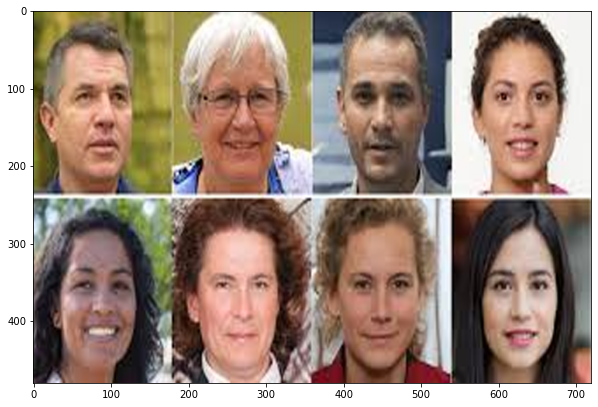

In [104]:
# puxando uma imagem com pessoas com vista frontal
image = cv2.imread("pessoas2.jpg")
res = cv2.resize(image, dsize = (720, 480), interpolation = cv2.INTER_CUBIC)
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,7))
plt.imshow(res);

In [105]:
# Utilizando os arquivos .xml com classificação de faces frontais
face_class = cv2.CascadeClassifier('xml/haarcascade_frontalface_default.xml')

In [109]:
# Em escala de cinza é mais rápido, pois só tem um canal ao invés de 3 em RGB
image_gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
# só o rosto
faces = face_class.detectMultiScale(image_gray, 1.3, 5)

# o detectMultiScale determina por padrão o que é um rosto e fornece as coordenadas na foto
# (x,y) um ponto na foto e (w,h) a largura e espessura do quadrado
for (x,y,w,h) in faces:
    # cv2.rectangle(imagem, start_point, end_point, cor, espessura do frame do quadrado)
    cv2.rectangle(res, (x,y), (x+w, y+h), (255,0,0), 2)


cv2.imshow('pessoa1', res)
# Aparentemente precisa colocar, mas não sei porquê
cv2.waitKey(0)
cv2.destroyWindow('pessoa1')

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: 'pessoa1' in function 'cvDestroyWindow'


In [110]:
faces
# Número de quadrados: identificação de 7 faces de 8. Cada face é um array

array([[ 23,  57, 136, 136],
       [562,  55, 139, 139],
       [375,  51, 151, 151],
       [558, 300, 140, 140],
       [ 23, 301, 133, 133],
       [204, 300, 131, 131],
       [371, 291, 154, 154]])